여러분 EDA 화이팅! 화이팅!

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!apt-get install -y fonts-nanum*

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 4 newly installed, 0 to remove and 20 not upgraded.
Need to get 46.0 MB of archives.
After this operation, 177 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-coding all 2.5-3 [4,988 B]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-eco all 1.000-7 [14.7 MB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-extra all 20200506-1 [21.0

In [ ]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 67.5 MB/s eta 0:00:00


In [ ]:
import koreanize_matplotlib

# 요일별 추세 파악

In [ ]:
import pandas as pd

# 데이터 로드 및 전처리
def load_and_prepare_data(file_path):
    df = pd.read_csv(file_path, encoding='utf-8')
    df["출고일자"] = pd.to_datetime(df["출고일자"])
    df["요일"] = df["출고일자"].dt.day_name()
    return df

# 요일별 출고량 통계량 확인
def weekday_eda(df):
    weekday_stats = df.groupby("요일")["출고건수"].agg(["count", "mean", "median", "std", "max", "min"]).reindex(
        ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    )

    # 요일별 출고량 비율 계산
    total_shipments = df["출고건수"].sum()
    weekday_stats["비율(%)"] = (weekday_stats["count"] / df.shape[0]) * 100

    # 결과 출력
    print("\n📊 요일별 혈액 출고량 분석 결과:")
    display(weekday_stats)  # Colab에서 DataFrame 출력

    return weekday_stats

# 실행
file_path = '/content/gdrive/My Drive/co-data/seoul_blood.csv'
df = load_and_prepare_data(file_path)
weekday_stats = weekday_eda(df)



📊 요일별 혈액 출고량 분석 결과:


,count,mean,median,std,max,min,비율(%)
요일,,,,,,,
Monday,27779,30.805537,3.0,85.576246,957,1,17.556422
Tuesday,28308,29.994948,3.0,86.617288,1103,1,17.890752
Wednesday,26979,31.860188,3.0,90.572722,1070,1,17.050819
Thursday,26900,32.807398,3.0,92.341189,970,1,17.000891
Friday,26081,34.045819,3.0,93.890102,1060,1,16.483280
Saturday,13447,44.884584,8.0,91.055997,927,1,8.498550
Sunday,8733,58.959579,23.0,91.051385,653,1,5.519286


<ipython-input-43-7265ea9e7450>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top10['weekday'] = df_top10['출고일자'].dt.day_name()


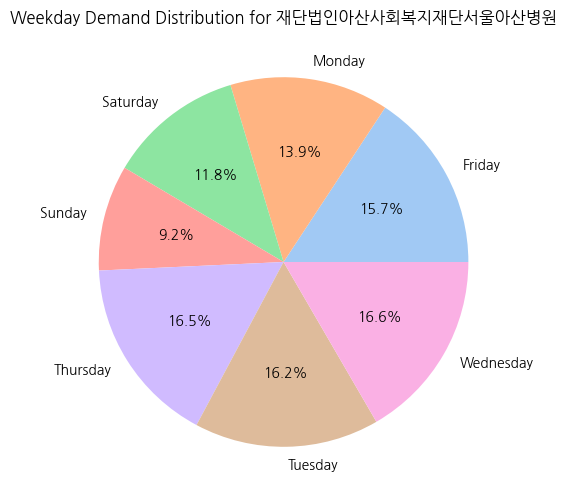

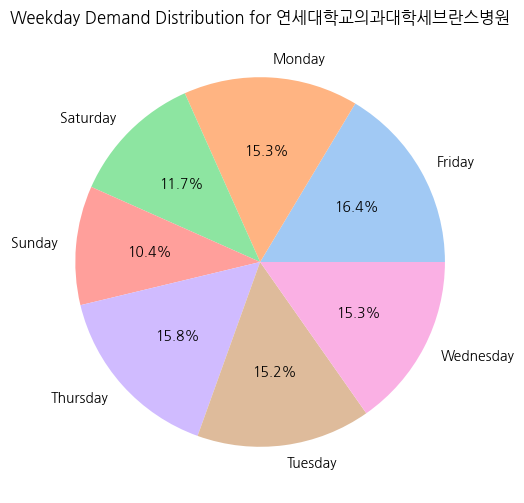

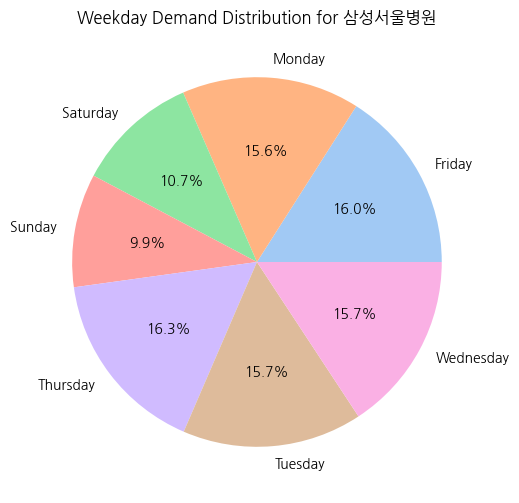

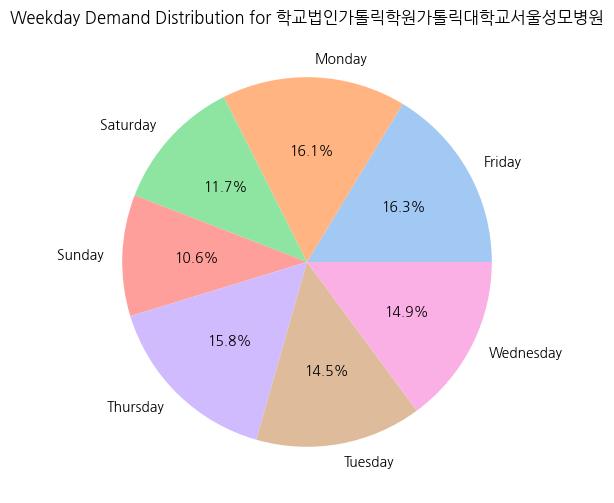

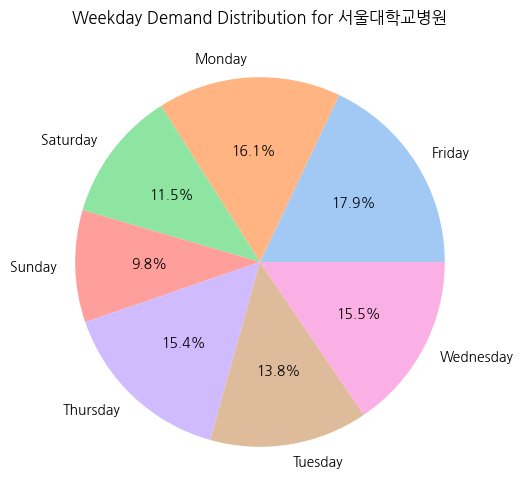

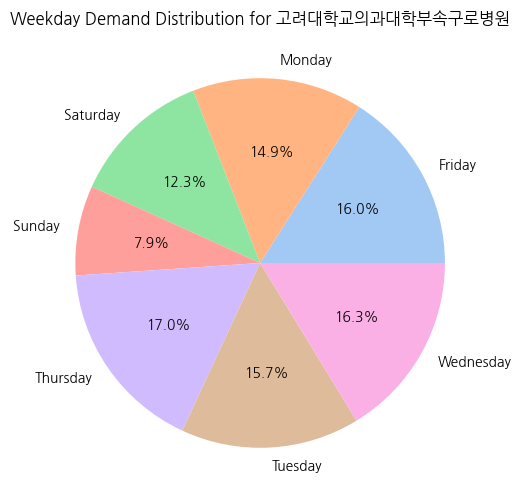

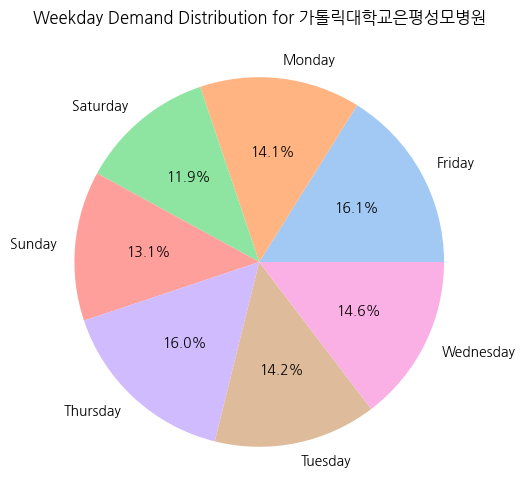

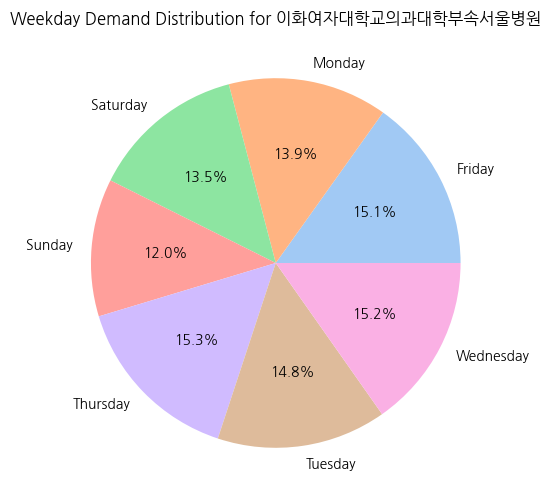

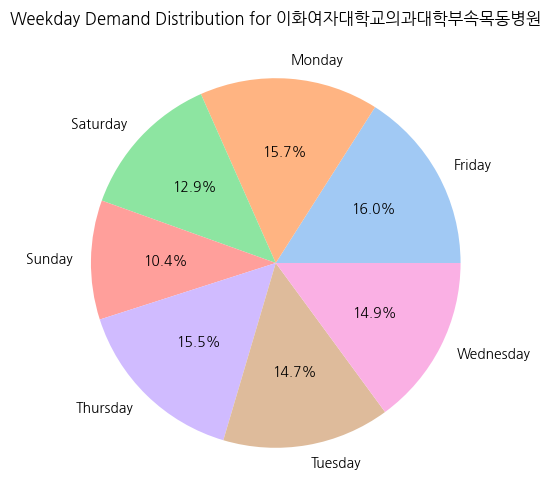

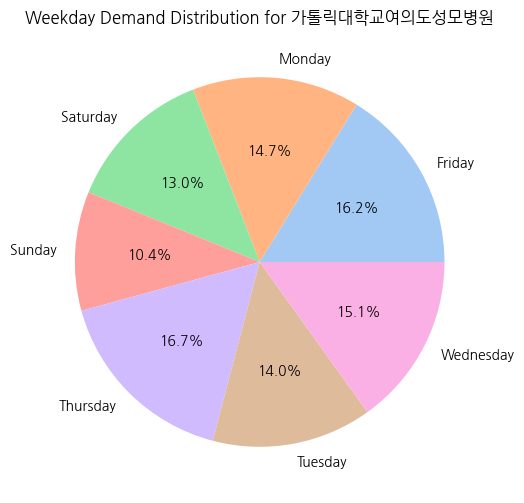

In [ ]:
# 상위 10개 병원 선택
top_10_hospitals = df.groupby('기관명')['출고건수'].sum().nlargest(10).index
df_top10 = df[df['기관명'].isin(top_10_hospitals)]

df_top10['weekday'] = df_top10['출고일자'].dt.day_name()
# 병원별 요일별 수요량 계산
hospital_weekday_demand = df_top10.groupby(['기관명', 'weekday']).agg({'출고건수': 'sum'}).reset_index()

# 요일 순서 정렬
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hospital_weekday_demand['weekday'] = pd.Categorical(hospital_weekday_demand['weekday'], categories=weekday_order, ordered=True)

# 개별 병원의 원그래프 시각화
for hospital in top_10_hospitals:
    data = hospital_weekday_demand[hospital_weekday_demand['기관명'] == hospital]
    plt.figure(figsize=(6, 6))
    plt.pie(data['출고건수'], labels=data['weekday'], autopct='%1.1f%%', colors=sns.color_palette('pastel'))
    plt.title(f'Weekday Demand Distribution for {hospital}')
    plt.show()

# 병원별 추세 파악

# 월별 추세 파악

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 데이터 로드
df_hy = pd.read_csv('/content/gdrive/My Drive/co-data/seoul_blood.csv', parse_dates=['출고일자'])  # date 컬럼이 날짜 형식이어야 함

FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/My Drive/co-data/seoul_blood.csv'

In [ ]:
# 상위 50개 병원 선택
top_50_hospitals = df_hy.groupby('기관명')['출고건수'].sum().nlargest(50).index
df_top50 = df_hy[df_hy['기관명'].isin(top_50_hospitals)]

In [ ]:
# 요일 정보 추가
df_top50['weekday'] = df_top50['출고일자'].dt.day_name()
df_top50['weekday_num'] = df_top50['출고일자'].dt.weekday  # 0: 월요일, 6: 일요일

<ipython-input-8-56f81c7e44dc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top50['weekday'] = df_top50['출고일자'].dt.day_name()
<ipython-input-8-56f81c7e44dc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top50['weekday_num'] = df_top50['출고일자'].dt.weekday  # 0: 월요일, 6: 일요일


In [ ]:
# 월 정보 추가
df_top50['month'] = df_top50['출고일자'].dt.to_period('M')

<ipython-input-9-b9b4942afacb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top50['month'] = df_top50['출고일자'].dt.to_period('M')


In [ ]:
# 월별 평균 혈액팩 수요량 계산
monthly_avg_demand = df_top50.groupby(['month', 'weekday']).agg({'출고건수': 'mean'}).reset_index()

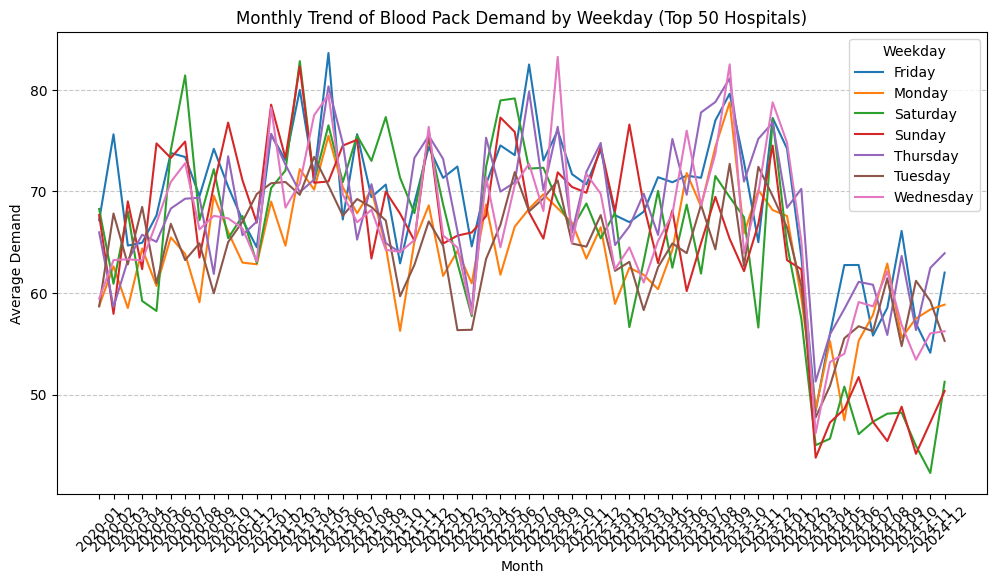

In [ ]:
# 'month' 컬럼을 문자열로 변환
monthly_avg_demand['month'] = monthly_avg_demand['month'].astype(str)

# 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg_demand, x='month', y='출고건수', hue='weekday', palette='tab10')
plt.title('Monthly Trend of Blood Pack Demand by Weekday (Top 50 Hospitals)')
plt.xlabel('Month')
plt.ylabel('Average Demand')
plt.xticks(rotation=45)
plt.legend(title='Weekday')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


요일별 출고량 통계량 확인

In [ ]:
import pandas as pd

# 데이터 로드 및 전처리
def load_and_prepare_data(file_path):
    df = pd.read_csv(file_path, encoding='utf-8')
    df["출고일자"] = pd.to_datetime(df["출고일자"])
    df["요일"] = df["출고일자"].dt.day_name()
    return df

# 요일별 출고량 통계량 확인
def weekday_eda(df):
    weekday_stats = df.groupby("요일")["출고건수"].agg(["count", "mean", "median", "std", "max", "min"]).reindex(
        ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    )

    # 요일별 출고량 비율 계산
    total_shipments = df["출고건수"].sum()
    weekday_stats["비율(%)"] = (weekday_stats["count"] / df.shape[0]) * 100

    # 결과 출력
    print("\n📊 요일별 혈액 출고량 분석 결과:")
    display(weekday_stats)  # Colab에서 DataFrame 출력

    return weekday_stats

# 실행
file_path = '/content/gdrive/My Drive/co-data/seoul_blood.csv'
df = load_and_prepare_data(file_path)
weekday_stats = weekday_eda(df)



📊 요일별 혈액 출고량 분석 결과:


,count,mean,median,std,max,min,비율(%)
요일,,,,,,,
Monday,27779,30.805537,3.0,85.576246,957,1,17.556422
Tuesday,28308,29.994948,3.0,86.617288,1103,1,17.890752
Wednesday,26979,31.860188,3.0,90.572722,1070,1,17.050819
Thursday,26900,32.807398,3.0,92.341189,970,1,17.000891
Friday,26081,34.045819,3.0,93.890102,1060,1,16.483280
Saturday,13447,44.884584,8.0,91.055997,927,1,8.498550
Sunday,8733,58.959579,23.0,91.051385,653,1,5.519286


# 서울시 구역별 수요량


In [ ]:
import pandas as pd
import requests

# 카카오 API 키 설정
KAKAO_API_KEY = "15d0a964b3a1eb1c4da7e6df6b1ad2cf"
KAKAO_API_URL = "https://dapi.kakao.com/v2/local/search/keyword.json"

# CSV 데이터 로드
df = pd.read_csv('/content/gdrive/My Drive/co-data/seoul_blood.csv')

# 중복 없는 병원 목록 생성
unique_hospitals = df['기관명'].unique()

# 병원별 구 정보 매핑
district_mapping = {}

def get_district(hospital_name):
    headers = {"Authorization": f"KakaoAK {KAKAO_API_KEY}"}
    params = {"query": hospital_name, "size": 1}
    response = requests.get(KAKAO_API_URL, headers=headers, params=params)

    if response.status_code == 200:
        result = response.json()
        if result['documents']:
            address = result['documents'][0]['address_name']
            district = address.split()[1] if '서울' in address else 'Unknown'
            return district
    return None

# 중복 없는 병원 리스트에 대해 한 번씩만 API 호출
for hospital in unique_hospitals:
    district = get_district(hospital)
    if district is None:
        district = input(f"'{hospital}' 병원의 구 정보를 찾을 수 없습니다. 직접 입력해주세요: ")
    district_mapping[hospital] = district

# 기존 데이터프레임에 매핑된 구 정보 추가
df['district'] = df['기관명'].map(district_mapping)


'고려대학교의과대학부속구로병원' 병원의 구 정보를 찾을 수 없습니다. 직접 입력해주세요: 구로구
'학교법인가톨릭학원가톨릭대학교서울성모병원' 병원의 구 정보를 찾을 수 없습니다. 직접 입력해주세요: 서초구
'의료법인서울효천의료재단에이치플러스양지병원' 병원의 구 정보를 찾을 수 없습니다. 직접 입력해주세요: 관악구
'의료법인서광의료재단성북중앙병원' 병원의 구 정보를 찾을 수 없습니다. 직접 입력해주세요: 성북구
'의료법인부원의료재단서초요양병원' 병원의 구 정보를 찾을 수 없습니다. 직접 입력해주세요: 서초구
'의료법인한전의료재단한일병원' 병원의 구 정보를 찾을 수 없습니다. 직접 입력해주세요: 도봉구
'금강아산병원(재단법인아산사회복지재단)' 병원의 구 정보를 찾을 수 없습니다. 직접 입력해주세요: 용산구
'뉴서울성모요양병원' 병원의 구 정보를 찾을 수 없습니다. 직접 입력해주세요: 영등포구
'소람한방병원' 병원의 구 정보를 찾을 수 없습니다. 직접 입력해주세요: 강남구
'재단법인베스티안재단베스티안서울병원' 병원의 구 정보를 찾을 수 없습니다. 직접 입력해주세요: 성동구
'재단법인제중의료복지재단제중요양병원' 병원의 구 정보를 찾을 수 없습니다. 직접 입력해주세요: 구로구
'의료법인성석의료재단동작경희병원' 병원의 구 정보를 찾을 수 없습니다. 직접 입력해주세요: 동작구
'의료법인참예원의료재단송파참노인전문병원' 병원의 구 정보를 찾을 수 없습니다. 직접 입력해주세요: 송파구
'의료법인행복나눔의료재단사랑요양병원' 병원의 구 정보를 찾을 수 없습니다. 직접 입력해주세요: 노원구
'리안요양병원' 병원의 구 정보를 찾을 수 없습니다. 직접 입력해주세요: 광진구
'안석주내과의원' 병원의 구 정보를 찾을 수 없습니다. 직접 입력해주세요: 동대문구
'미래드림여성병원' 병원의 구 정보를 찾을 수 없습니다. 직접 입력해주세요: 관악구
'사회복지법인성가소비녀회성가복지병원' 병원의 구 정보를 찾을 수 없습니다. 직접 입력해주세요: 성북구
'제이스엠비산부인과의원' 병원의 구 정보를 찾을 수

In [ ]:
df

,출고일자,기관명,출고건수,병원경도,병원위도,district
0,2020-01-01,가톨릭대학교여의도성모병원,18,126.936731,37.518272,영등포구
1,2020-01-01,가톨릭대학교은평성모병원,56,126.916150,37.633608,은평구
2,2020-01-01,강동경희대학교의대병원,36,127.157085,37.552046,강동구
3,2020-01-01,강북삼성병원,27,126.967938,37.568498,종로구
4,2020-01-01,건국대학교병원,38,127.072123,37.540845,광진구
...,...,...,...,...,...,...
158222,2024-12-31,혜민병원,10,127.083601,37.535316,광진구
158223,2024-12-31,호산여성병원,1,127.033354,37.528568,강남구
158224,2024-12-31,희명병원,26,126.900563,37.455671,금천구
158225,2024-12-31,힘찬병원,14,126.876847,37.524981,Unknown


In [ ]:
# 중복 없는 병원 목록 생성
unique_hospitals = df['기관명'].unique()

# 기존 데이터프레임에서 이미 존재하는 구 정보 로드
district_mapping = df.set_index('기관명')['district'].to_dict()

# 중복 없는 병원 리스트에 대해 한 번씩만 API 호출
for hospital in unique_hospitals:
    if hospital not in district_mapping or pd.isna(district_mapping[hospital]) or district_mapping[hospital] == 'Unknown':
        district = get_district(hospital)
        if district is None or district == 'Unknown':
            district = input(f"'{hospital}' 병원의 구 정보를 찾을 수 없습니다. 직접 입력해주세요: ")
        district_mapping[hospital] = district

# 기존 데이터프레임에 매핑된 구 정보 추가
df['district'] = df['기관명'].map(district_mapping)


'힘찬병원' 병원의 구 정보를 찾을 수 없습니다. 직접 입력해주세요: 양천구
'구세산부인과의원' 병원의 구 정보를 찾을 수 없습니다. 직접 입력해주세요: 은평구
'나누리병원' 병원의 구 정보를 찾을 수 없습니다. 직접 입력해주세요: 강남구
'연세에이스정형외과의원' 병원의 구 정보를 찾을 수 없습니다. 직접 입력해주세요: 동작구
'예나산부인과의원' 병원의 구 정보를 찾을 수 없습니다. 직접 입력해주세요: 강서구
'예스병원' 병원의 구 정보를 찾을 수 없습니다. 직접 입력해주세요: 구로구
'올림픽병원' 병원의 구 정보를 찾을 수 없습니다. 직접 입력해주세요: 송파구
'9988병원' 병원의 구 정보를 찾을 수 없습니다. 직접 입력해주세요: 성동구
'굿모닝정형외과의원' 병원의 구 정보를 찾을 수 없습니다. 직접 입력해주세요: 강북구
'예진산부인과의원' 병원의 구 정보를 찾을 수 없습니다. 직접 입력해주세요: 동대문구
'김정훈내과의원' 병원의 구 정보를 찾을 수 없습니다. 직접 입력해주세요: 송파구
'노블요양병원' 병원의 구 정보를 찾을 수 없습니다. 직접 입력해주세요: 은평구
'모태산부인과의원' 병원의 구 정보를 찾을 수 없습니다. 직접 입력해주세요: 관악구
'서울삼성정형외과의원' 병원의 구 정보를 찾을 수 없습니다. 직접 입력해주세요: 강서구
'이지정형외과의원' 병원의 구 정보를 찾을 수 없습니다. 직접 입력해주세요: 관악구
'은산부인과의원' 병원의 구 정보를 찾을 수 없습니다. 직접 입력해주세요: 은평구
'효성요양병원' 병원의 구 정보를 찾을 수 없습니다. 직접 입력해주세요: 강북구
'연세쿰내과의원' 병원의 구 정보를 찾을 수 없습니다. 직접 입력해주세요: 송파구
'우리산부인과의원' 병원의 구 정보를 찾을 수 없습니다. 직접 입력해주세요: 용산구
'소망의원' 병원의 구 정보를 찾을 수 없습니다. 직접 입력해주세요: 중구
'준내과의원' 병원의 구 정보를 찾을 수 없습니다. 직접 입력해주세요: 강동구
'참푸른병원' 병원의 구 정보를 찾을 수 없습니다. 직접 입력해주세

In [ ]:
df

,출고일자,기관명,출고건수,병원경도,병원위도,district
0,2020-01-01,가톨릭대학교여의도성모병원,18,126.936731,37.518272,영등포구
1,2020-01-01,가톨릭대학교은평성모병원,56,126.916150,37.633608,은평구
2,2020-01-01,강동경희대학교의대병원,36,127.157085,37.552046,강동구
3,2020-01-01,강북삼성병원,27,126.967938,37.568498,종로구
4,2020-01-01,건국대학교병원,38,127.072123,37.540845,광진구
...,...,...,...,...,...,...
158222,2024-12-31,혜민병원,10,127.083601,37.535316,광진구
158223,2024-12-31,호산여성병원,1,127.033354,37.528568,강남구
158224,2024-12-31,희명병원,26,126.900563,37.455671,금천구
158225,2024-12-31,힘찬병원,14,126.876847,37.524981,양천구


In [ ]:
# 결과 저장
df.to_csv('/content/gdrive/My Drive/co-data/hospital_information.csv', index=False)

print("CSV 파일 저장 완료: 응...")

CSV 파일 저장 완료: 응...


<ipython-input-30-599ea95af74e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=eda_df, x='district', y='sum', palette='viridis')


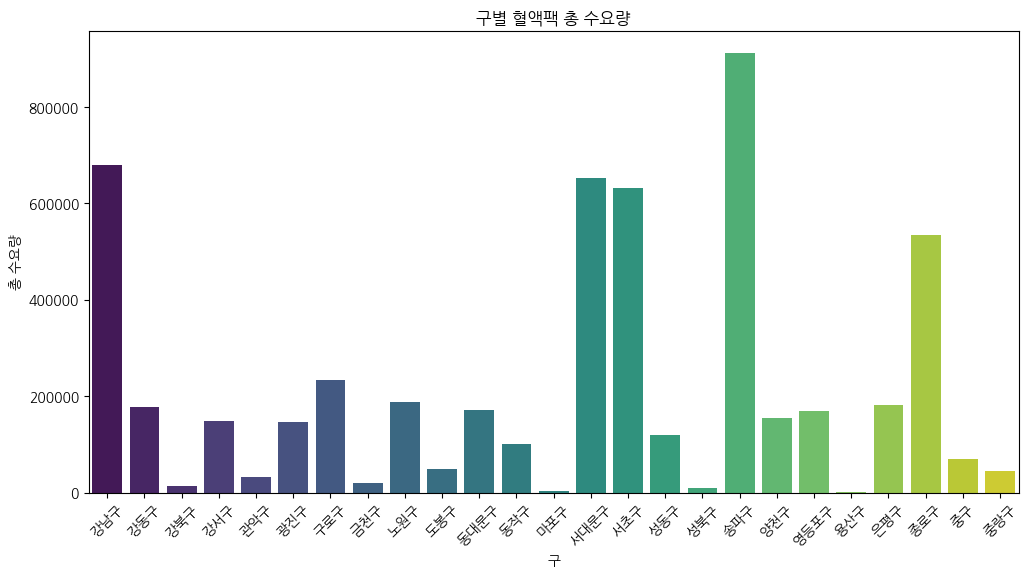

<ipython-input-30-599ea95af74e>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='district', y='출고건수', palette='Set2')


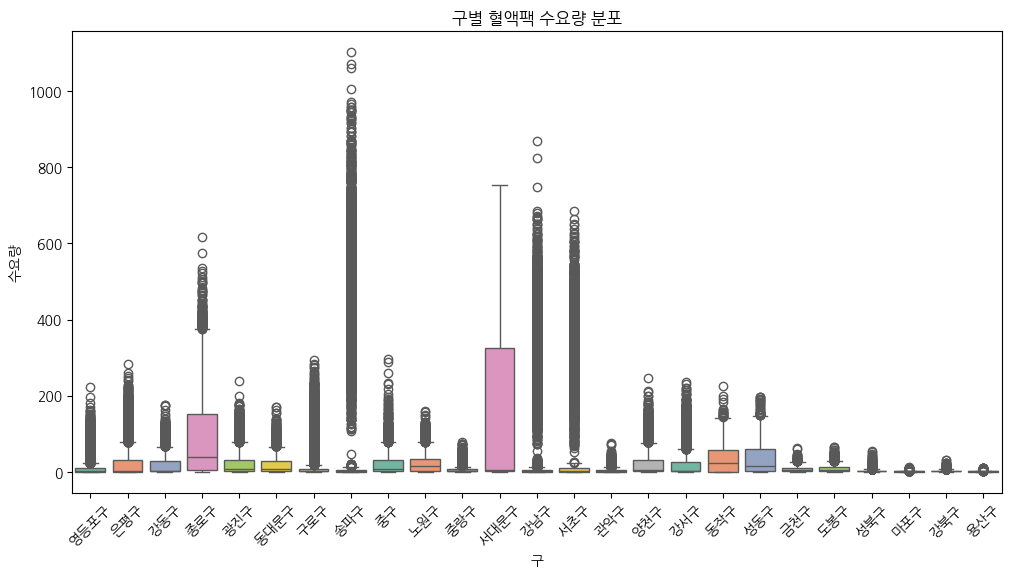

In [ ]:
# EDA 수행
eda_df = df.groupby('district')['출고건수'].agg(['count', 'sum', 'mean', 'median', 'min', 'max', 'std']).reset_index()

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=eda_df, x='district', y='sum', palette='viridis')
plt.xticks(rotation=45)
plt.title('구별 혈액팩 총 수요량')
plt.xlabel('구')
plt.ylabel('총 수요량')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='district', y='출고건수', palette='Set2')
plt.xticks(rotation=45)
plt.title('구별 혈액팩 수요량 분포')
plt.xlabel('구')
plt.ylabel('수요량')
plt.show()

각 구별 수요량이 가장 많은 병원:
강남구 : 삼성서울병원 (632002)
강동구 : 강동경희대학교의대병원 (94160)
강북구 : 서울현대병원 (3289)
강서구 : 이화여자대학교의과대학부속서울병원 (130592)
관악구 : 의료법인서울효천의료재단에이치플러스양지병원 (23063)
광진구 : 건국대학교병원 (118386)
구로구 : 고려대학교의과대학부속구로병원 (206016)
금천구 : 희명병원 (18212)
노원구 : 인제대학교상계백병원 (87151)
도봉구 : 의료법인한전의료재단한일병원 (35319)
동대문구 : 경희대학교병원 (91758)
동작구 : 중앙대학교병원 (99495)
마포구 : 연세한강병원 (1181)
서대문구 : 연세대학교의과대학세브란스병원 (645458)
서초구 : 학교법인가톨릭학원가톨릭대학교서울성모병원 (614135)
성동구 : 한양대학교병원 (114113)
성북구 : 보문효사랑요양병원 (3758)
송파구 : 재단법인아산사회복지재단서울아산병원 (893600)
양천구 : 이화여자대학교의과대학부속목동병원 (128006)
영등포구 : 가톨릭대학교여의도성모병원 (123481)
용산구 : 금강아산병원(재단법인아산사회복지재단) (810)
은평구 : 가톨릭대학교은평성모병원 (170014)
종로구 : 서울대학교병원 (434980)
중구 : 국립중앙의료원 (67503)
중랑구 : 서울특별시서울의료원 (30298)
전체에서 수요량이 가장 많은 10개 병원:
재단법인아산사회복지재단서울아산병원 (893600)
연세대학교의과대학세브란스병원 (645458)
삼성서울병원 (632002)
학교법인가톨릭학원가톨릭대학교서울성모병원 (614135)
서울대학교병원 (434980)
고려대학교의과대학부속구로병원 (206016)
가톨릭대학교은평성모병원 (170014)
이화여자대학교의과대학부속서울병원 (130592)
이화여자대학교의과대학부속목동병원 (128006)
가톨릭대학교여의도성모병원 (123481)


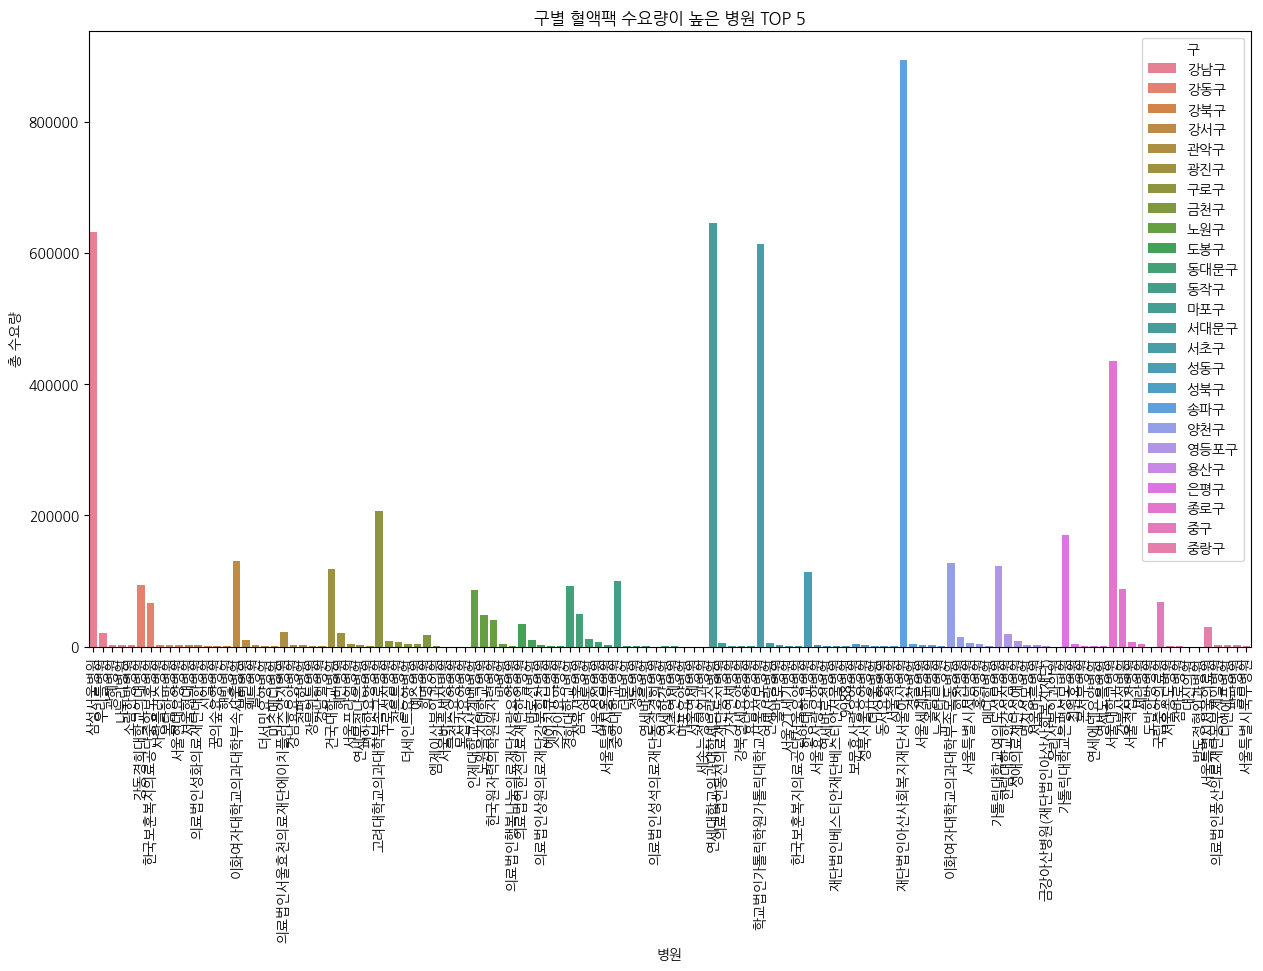

In [ ]:
# 특정 구에서 수요량이 높은 병원 상위 5개 분석
top_hospitals = df.groupby(['district', '기관명'])['출고건수'].sum().reset_index()
top_hospitals = top_hospitals.sort_values(by=['district', '출고건수'], ascending=[True, False])

# 각 구별로 상위 1개 병원만 선택
top_hospitals_1st = top_hospitals.groupby('district').head(1)

# 결과 출력
print("각 구별 수요량이 가장 많은 병원:")
for _, row in top_hospitals_1st.iterrows():
    print(f"{row['district']} : {row['기관명']} ({row['출고건수']})")

top10_hospitals = df.groupby(['기관명'])['출고건수'].sum().reset_index()
top10_hospitals = top_hospitals.sort_values(by='출고건수', ascending=False)

# 전체에서 출고건수가 가장 높은 10개 병원 선택
top_10_hospitals = top10_hospitals.head(10)

# 결과 출력
print("전체에서 수요량이 가장 많은 10개 병원:")
for _, row in top_10_hospitals.iterrows():
    print(f"{row['기관명']} ({row['출고건수']})")


plt.figure(figsize=(15, 8))
sns.barplot(data=top_hospitals.groupby('district').head(5), x='기관명', y='출고건수', hue='district', dodge=False)
plt.xticks(rotation=90)
plt.title('구별 혈액팩 수요량이 높은 병원 TOP 5')
plt.xlabel('병원')
plt.ylabel('총 수요량')
plt.legend(title='구')
plt.show()

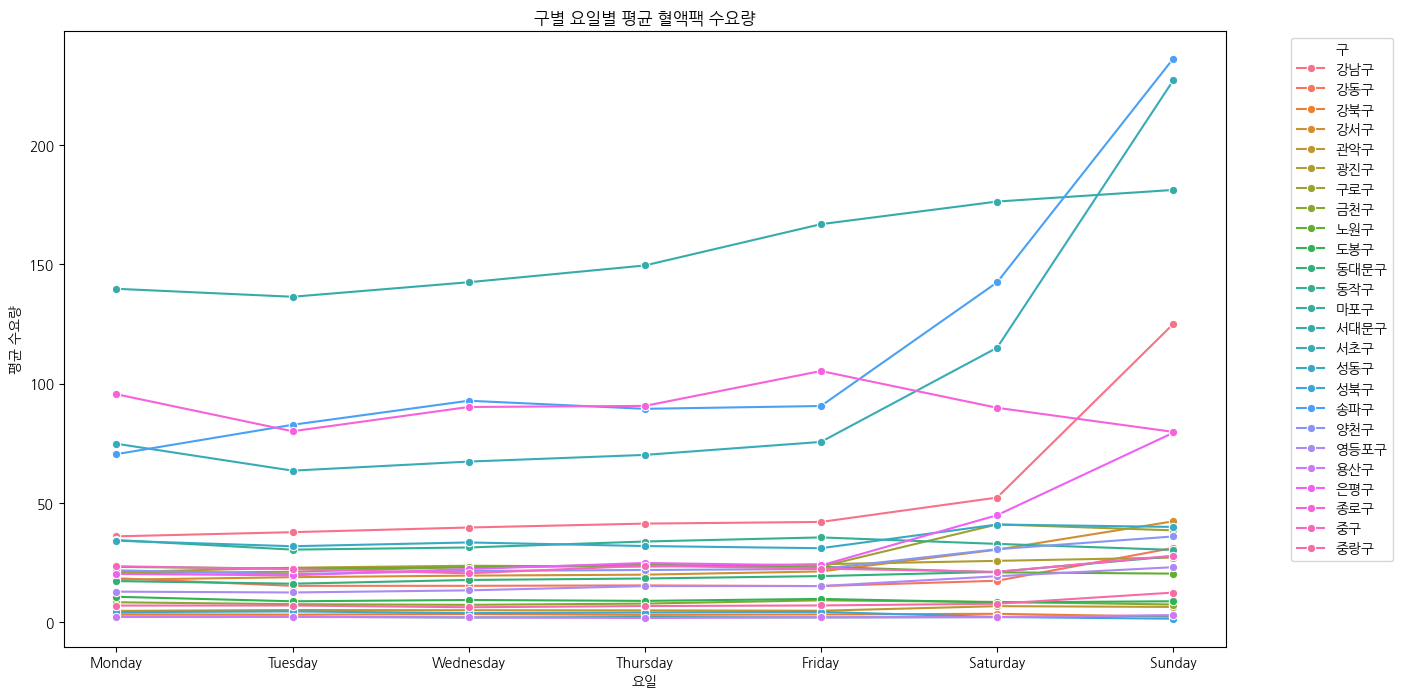

In [ ]:
# 요일별 트렌드 분석
df['출고일자'] = pd.to_datetime(df['출고일자'])  # 날짜 형식 변환
df['weekday'] = df['출고일자'].dt.day_name()  # 요일 컬럼 추가

weekday_trend = df.groupby(['district', 'weekday'])['출고건수'].mean().reset_index()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_trend['weekday'] = pd.Categorical(weekday_trend['weekday'], categories=weekday_order, ordered=True)

plt.figure(figsize=(15, 8))
sns.lineplot(data=weekday_trend, x='weekday', y='출고건수', hue='district', marker='o')
plt.title('구별 요일별 평균 혈액팩 수요량')
plt.xlabel('요일')
plt.ylabel('평균 수요량')
plt.legend(title='구', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<ipython-input-37-bc94f519c5b4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=eda_df, x='district', y='sum', palette='viridis')


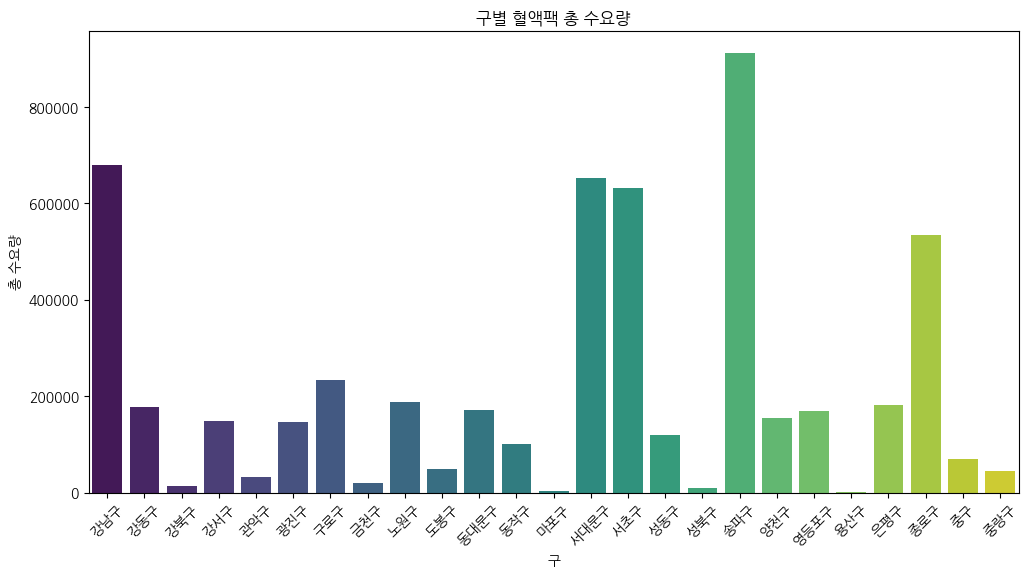

<ipython-input-37-bc94f519c5b4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='district', y='출고건수', palette='Set2')


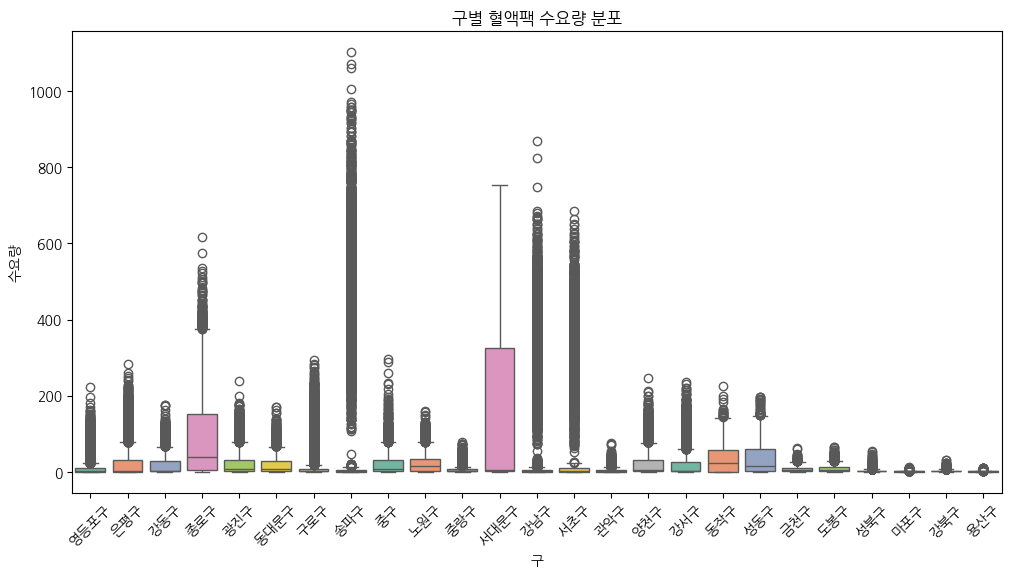

In [ ]:
# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=eda_df, x='district', y='sum', palette='viridis')
plt.xticks(rotation=45)
plt.title('구별 혈액팩 총 수요량')
plt.xlabel('구')
plt.ylabel('총 수요량')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='district', y='출고건수', palette='Set2')
plt.xticks(rotation=45)
plt.title('구별 혈액팩 수요량 분포')
plt.xlabel('구')
plt.ylabel('수요량')
plt.show()